In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np


In [2]:
Z=np.array([22,29,30,40,26,28,42,47])
#k_Alpha(Ti,Cu,Zn,Zr,Fe,Ni,Mo,Ag)
K_Alpha=np.array([4.57,7.99,8.60,15.81,6.34,7.42,17.47,22.00])
Delta_K_alpha=np.array([0.16,0.17,0.17,0.18,0.17,0.16,0.18,0.20])
sqrt_K_alpha=np.sqrt(K_Alpha)
Delta_sqrt_K_alpha=(Delta_K_alpha/sqrt_K_alpha)
#mit Fehler delta(sqrt(x))=delta(x)/sqrt(x)

Text(0.5,1,'$\\sqrt{E_\\alpha}$ als Funktion von z')

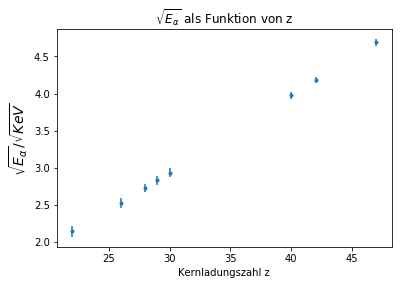

In [3]:
plt.errorbar(Z,sqrt_K_alpha,Delta_sqrt_K_alpha,fmt=".")
plt.xlabel('Kernladungszahl z')
plt.ylabel(r'$\sqrt{E_\alpha}/\sqrt{KeV}$',fontsize=14)
plt.title(r'$\sqrt{E_\alpha}$' + ' als Funktion von z')

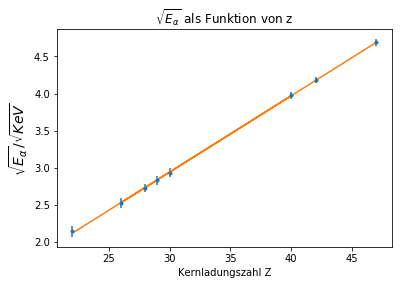

In [4]:
#sqrt_Er, sig12 sind Fitparameter
n1=1
n2=2
def fit_func(x, sqrt_Er, sig12):
    return sqrt_Er*(x-sig12)*np.sqrt(1/n1**2-1/n2**2)
from scipy.optimize import curve_fit
popt, pcov=curve_fit(fit_func, Z, sqrt_K_alpha, sigma=Delta_sqrt_K_alpha)
plt.errorbar(Z, sqrt_K_alpha, Delta_sqrt_K_alpha, fmt=".")
plt.xlabel('Kernladungszahl Z')
plt.ylabel(r'$\sqrt{E_\alpha}/\sqrt{KeV}$',fontsize=14)
plt.title(r'$\sqrt{E_\alpha}$' + ' als Funktion von z')
plt.plot(Z, fit_func(Z,*popt))

In [5]:
print("sqrt_Er=",popt[0], ",Standardfehler=",np.sqrt(pcov[0][0]))
print("sig12=",popt[1], ",Standardfehler=",np.sqrt(pcov[1][1]))
print("Er=", popt[0]**2, ", Stderr=", np.sqrt(pcov[0][0])*popt[0]*2)

sqrt_Er= 0.11920317106540217 ,Standardfehler= 0.00047539394308834197
sig12= 1.540143980717132 ,Standardfehler= 0.14200601120146097
Er= 0.014209395992047532 , Stderr= 0.00011333693104283137
